<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetic Retinopathy Starter Code

In [90]:
import pandas as pd
import io

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pickle

# Getting back the objects:
with open('/content/gdrive/My Drive/dr_data.pkl', 'rb') as f:  
    X_train, y_train, X_test = pickle.load(f)


In [92]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3.]), array([117,  24,  56, 103]))

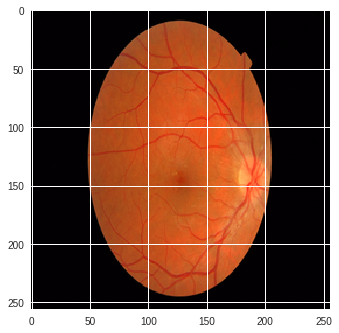

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0,:,:,:])

In [0]:
from keras.utils import to_categorical

train_images = X_train.astype('float32') / 255
test_images = X_test.astype('float32') / 255

train_label = to_categorical(y_train)



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_label, test_size=0.15, random_state=1)

In [96]:
X_val.shape

(45, 256, 256, 3)

In [0]:
# mine
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=180,
      width_shift_range=0.3,
      height_shift_range=0.4,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode = 'nearest')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [54]:
X_train.shape

(255, 256, 256, 3)

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256,256,3))

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          294976    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               295424    
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 2052      
Total para

In [88]:
train_datagen.fit(X_train)
history = model.fit_generator(train_datagen.flow(X_train,
                    y_train, batch_size=50),
                    epochs=30,
                    steps_per_epoch=100,
                    validation_data=(X_val, y_val))

Epoch 1/30
100/100 [==============================] - 90s 903ms/step - loss: 1.2853 - acc: 0.3390 - val_loss: 1.1439 - val_acc: 0.5111
Epoch 2/30
100/100 [==============================] - 82s 821ms/step - loss: 1.2826 - acc: 0.3483 - val_loss: 1.1515 - val_acc: 0.5111
Epoch 3/30
100/100 [==============================] - 84s 843ms/step - loss: 1.2852 - acc: 0.3623 - val_loss: 1.1547 - val_acc: 0.5333
Epoch 4/30
100/100 [==============================] - 83s 835ms/step - loss: 1.2680 - acc: 0.3878 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 5/30
100/100 [==============================] - 83s 825ms/step - loss: 1.2692 - acc: 0.3876 - val_loss: 1.1544 - val_acc: 0.6889
Epoch 6/30
100/100 [==============================] - 83s 831ms/step - loss: 1.2535 - acc: 0.3924 - val_loss: 1.1327 - val_acc: 0.7111
Epoch 7/30
100/100 [==============================] - 84s 835ms/step - loss: 1.2574 - acc: 0.4009 - val_loss: 1.1544 - val_acc: 0.7333
Epoch 8/30
100/100 [==============================] - 8

KeyboardInterrupt: ignored

In [89]:
model.evaluate(train_images, train_label)

300/300 [==============================] - 4s 14ms/step


[1.0469115726153055, 0.5633333325386047]

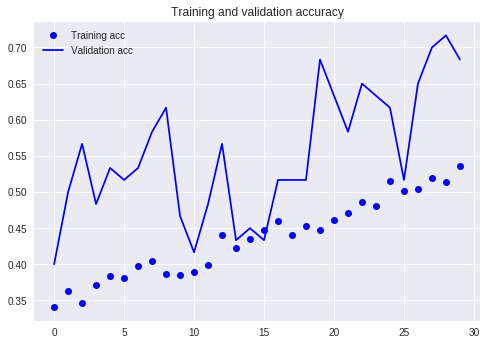

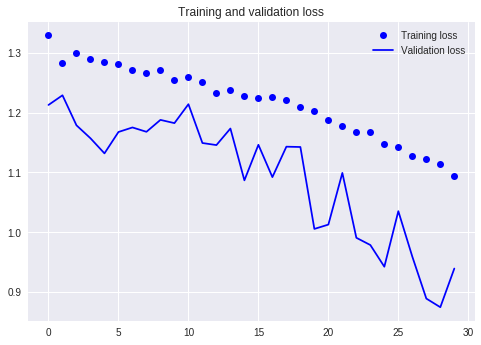

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import numpy as np
pred = model.predict(test_images)
mx = np.argmax(pred, axis=1)
out = pd.DataFrame({'y': mx})
out.to_csv("/content/gdrive/My Drive/Colab Notebooks/project/pred1204.csv")